In [1]:
# importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
dataset

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/diabetes.csv'

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Correlation plot of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt=".3f",cmap="YlGnBu")
plt.title("Correlation heatmap")

In [ ]:
# Exploring pregnancy and target values
plt.figure(figsize=(10,8))
# Plotting Density Function Graphs of the pregnancies and target variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"] == 1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"] == 0], color = "Blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])
plt.title("Pregnancies vs Outcome")
# sns.countplot(x='Pregnancies',hue='Outcome',data=dataset)

In [ ]:
#  Exploring Glucose and target values
plt.figure(figsize=(10,8))
# Plotting violinplot in plot
sns.violinplot(x='Outcome',y='Glucose',data=dataset , split=True, linewidth=2,inner="quart")

In [ ]:
# Exploring Glucose and target values
plt.figure(figsize=(10,8))
# Plotting Density Function Graphs of the Glucose and target variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"] == 1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"] == 0], color = "Blue", fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])
plt.title("Pregnancies vs Outcome")

In [ ]:
# Replace 0 values with the mean or median of the respective feature
# Glucose
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].median())
# BloodPressure
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].median())
# BMI
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].mean())
# SkinThickness
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].mean())
# Insulin
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].mean())


In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [ ]:
# Splinting the dependent and independent variable
x = dataset.drop(columns = 'Outcome', axis =1)
y = dataset['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Spliting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
464           10      115             98      20.536458   79.799479  24.0   
223            7      142             60      33.000000  190.000000  28.8   
393            4      116             72      12.000000   87.000000  22.1   
766            1      126             60      20.536458   79.799479  30.1   
570            3       78             70      20.536458   79.799479  32.5   
..           ...      ...            ...            ...         ...   ...   
71             5      139             64      35.000000  140.000000  28.6   
106            1       96            122      20.536458   79.799479  22.4   
270           10      101             86      37.000000   79.799479  45.6   
435            0      141             72      20.536458   79.799479  42.4   
102            0      125             96      20.536458   79.799479  22.5   

     DiabetesPedigreeFunction  Age  
464                     1.022   34  
2

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
training_accuracy = []
test_accuracy = []
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)

  # Checking accuracy score
  training_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))

Text(0, 0.5, 'Accuracy')

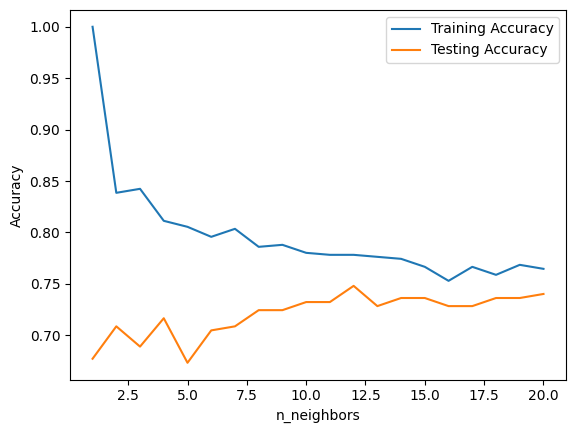

In [ ]:
plt.plot(range(1,21),training_accuracy,label="Training Accuracy")
plt.plot(range(1,21),test_accuracy,label="Testing Accuracy")
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),": Training Accuracy")
print(knn.score(x_test,y_test),": Testing Accuracy")

0.7879377431906615 : Training Accuracy
0.7244094488188977 : Testing Accuracy


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),": Training Accuracy")
print(dt.score(x_test,y_test),": Testing Accuracy")

1.0 : Training Accuracy
0.6811023622047244 : Testing Accuracy


In [ ]:
dt1 = DecisionTreeClassifier(random_state=0,max_depth=3)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train),": Training Accuracy")
print(dt1.score(x_test,y_test),": Testing Accuracy")

0.77431906614786 : Training Accuracy
0.6929133858267716 : Testing Accuracy


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),": Training Accuracy")
print(mlp.score(x_test,y_test),": Testing Accuracy")

0.7626459143968871 : Training Accuracy
0.6850393700787402 : Testing Accuracy


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
mlp1 = MLPClassifier(random_state=0)
mlp1.fit(x_train_scaled,y_train)
print(mlp1.score(x_train_scaled,y_train),": Training Accuracy")
print(mlp1.score(x_test_scaled,y_test),": Testing Accuracy")

0.8326848249027238 : Training Accuracy
0.7322834645669292 : Testing Accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
